# Are you a Starbucks lover too?

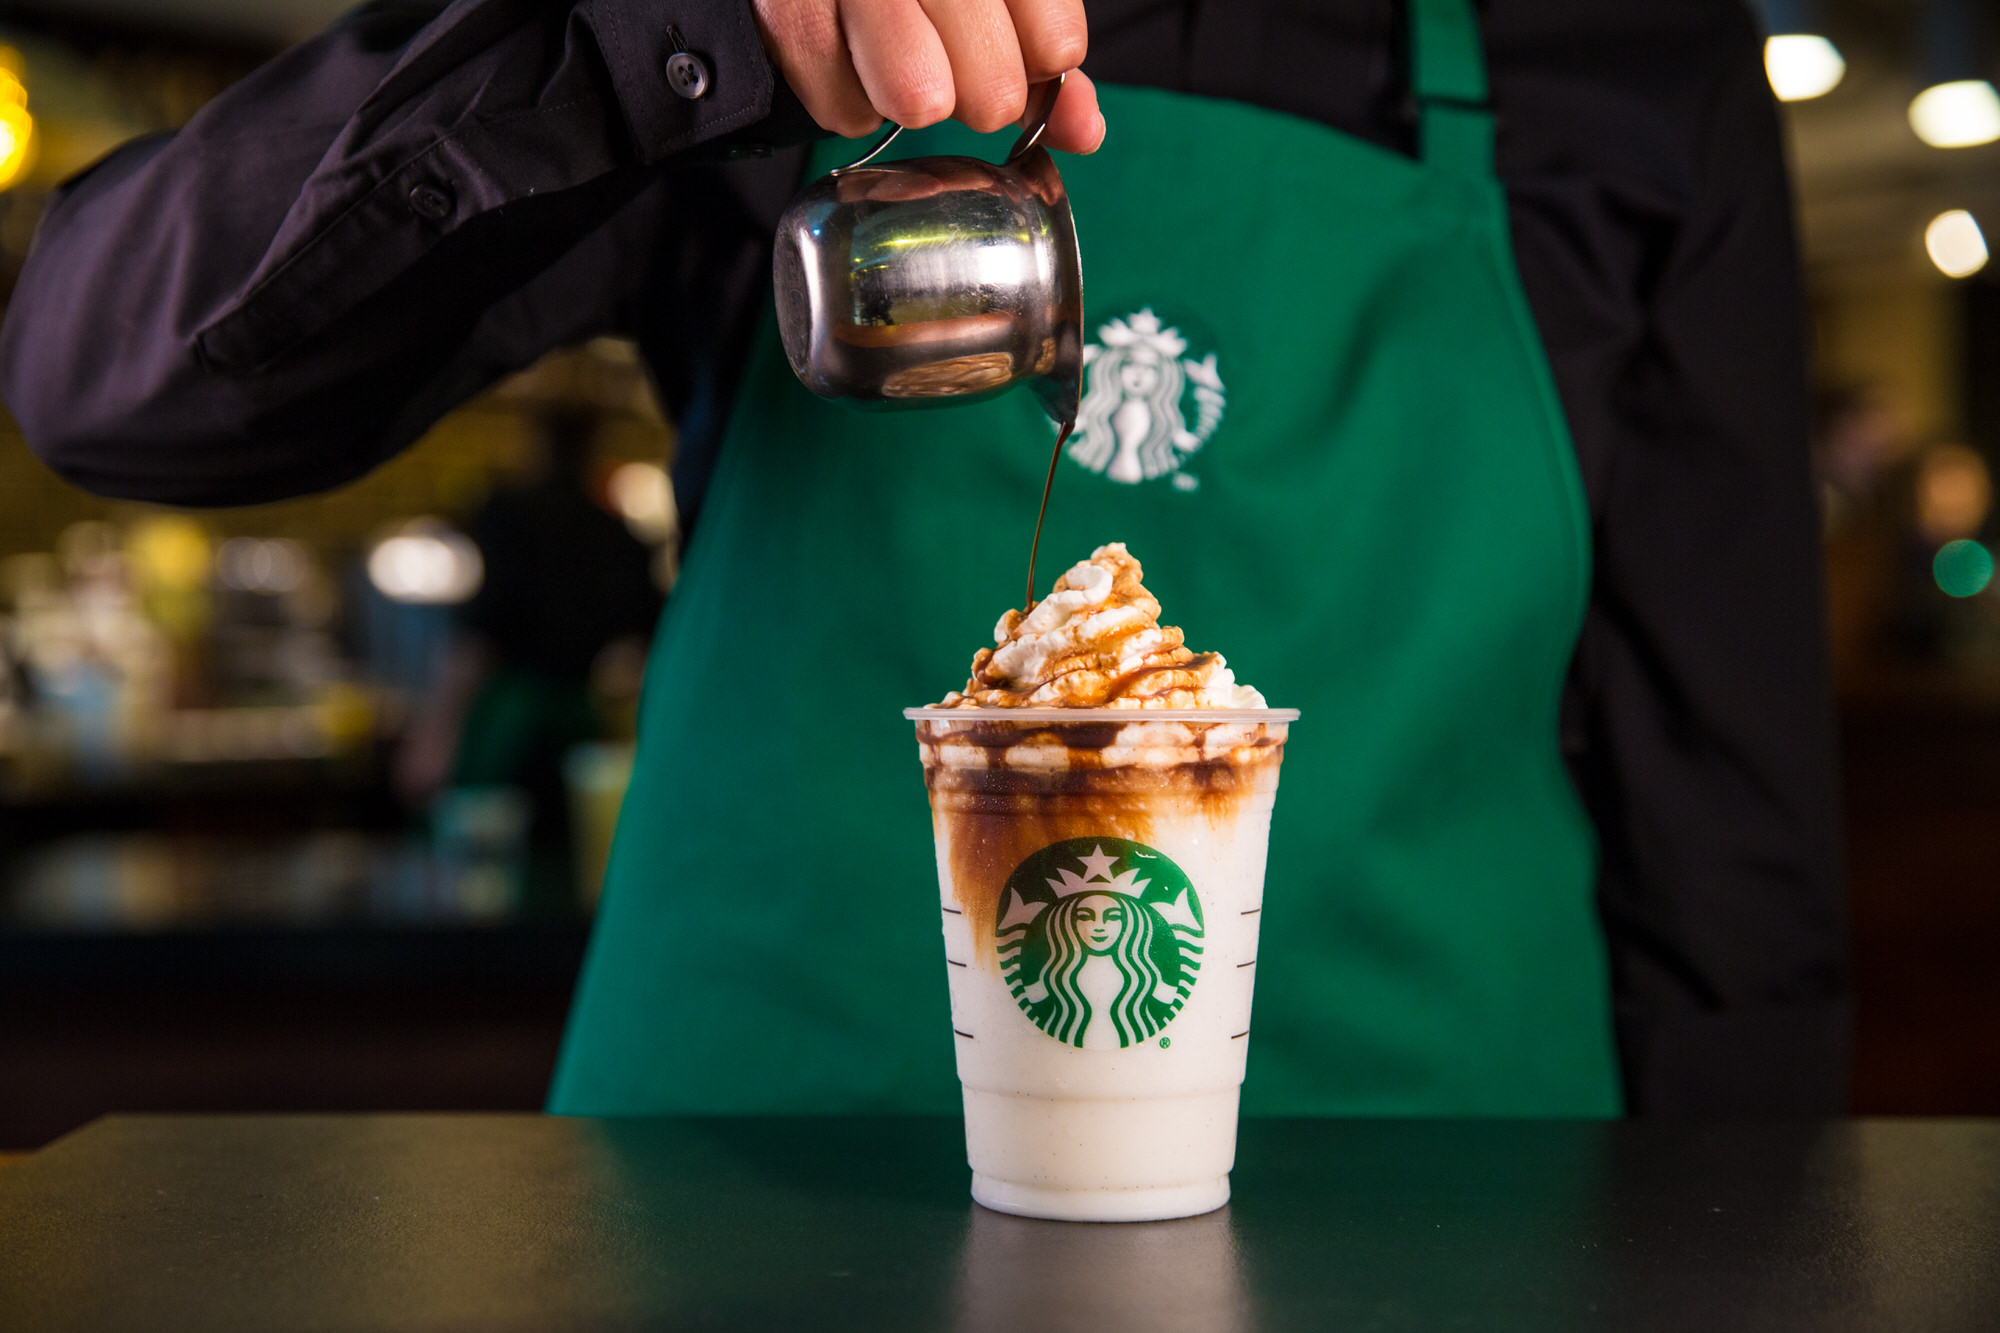

I'm Marco and in this notebook I will accompany you in viewing the secrets contained within the products of the beloved Starbucks brand. Our adventure begins here, let's go!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./iiuc_canteen/iiuc_canteen.csv")

df.loc[df[' Total Fat (g)'] == "3 2", ' Total Fat (g)'] = 3.2
df[' Total Fat (g)'] = df[' Total Fat (g)'].astype(np.float64)

perc_list = {'Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ', 'Iron (% DV) '}
for i in perc_list:
    df[i] = df[i].str.replace('%','').astype(np.float64)

So let's find out what the characteristics are that we are going to analyze by discovering what each of them indicates:

- The '**Beverage_category**' column classifies the type of beverage, such as coffee, tea, or smoothie. 
- The '**Beverage**' column provides the specific name of the drink, for instance, Caramel Macchiato or Green Tea Latte.
- The '**Beverage_prep**' column details the preparation method of the beverage, including whether it's served hot or cold, and any additional ingredients or toppings like whipped cream or syrup. The 'Calories' column lists the total caloric content of each beverage, providing insight into the energy provided by each drink.

- The next three columns, '**Total Fat (g)**', '**Trans Fat (g)**', and '**Saturated Fat (g)**', provide a breakdown of the fat content in each beverage. These columns are crucial for those monitoring their fat intake for health or dietary reasons. 
- The '**Sodium (mg)**' column indicates the amount of sodium in each beverage, which is essential information for individuals on low-sodium diets.

- The '**Total Carbohydrates (g)**' column provides the total carbohydrate content, including sugars, which is particularly useful for people managing diabetes or following a low-carb diet.
- Lastly, the '**Cholesterol (mg)**' column lists the amount of cholesterol in each beverage, a critical factor for those monitoring their cholesterol levels.

# Good morning, what would you like to drink? ☕, 🍵 or 🥤?
First let's find out into which broad categories we can divide the products

In [2]:
def f(row):
    if row['Beverage_category'] == 'Tazo® Tea Drinks':
        val = 'Tea'
    elif row['Beverage_category'] == 'Smoothies':
        val = 'Smoothie'
    else:
        val = 'Caffee'
    return val

df['Type_of_product'] = df.apply(f, axis=1)


[Text(0, 0, '181'), Text(0, 0, '52'), Text(0, 0, '9')]

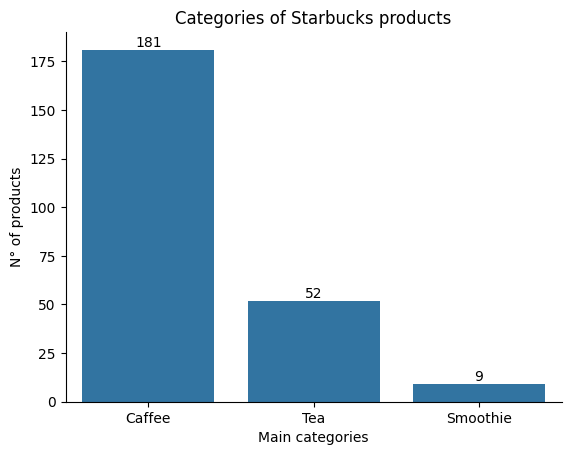

In [3]:
type_plot = sns.countplot(df, x="Type_of_product", order=df['Type_of_product'].value_counts(ascending=False).index)

type_plot.set(ylabel='N° of products', xlabel='Main categories', title = "Categories of Starbucks products")
sns.despine()
type_plot.bar_label(type_plot.containers[0])

Clearly it is as expected, Starbucks is one of the best known brands in the world especially thanks to its enormous variety of coffees, as the [official page on Wikipedia](https://en.wikipedia.org/wiki/Starbucks) also confirms by writing this:

> The rise of the second wave of coffee culture is generally attributed to Starbucks, which introduced a wider variety of coffee experiences.

At this point, why not take a look at what types of coffee Starbucks offers?

[Text(0, 0, '58'),
 Text(0, 0, '40'),
 Text(0, 0, '36'),
 Text(0, 0, '18'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '4')]

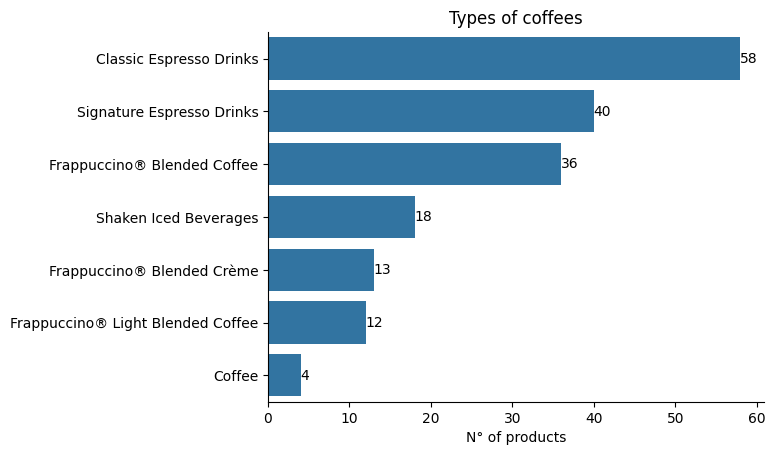

In [4]:
coffees = df[df["Type_of_product"] == "Caffee"]

coffee_plot = sns.countplot(coffees, y="Beverage_category", order=coffees['Beverage_category'].value_counts(ascending=False).index)

coffee_plot.set(xlabel='N° of products',ylabel = "", title = "Types of coffees")
sns.despine()
coffee_plot.bar_label(coffee_plot.containers[0])

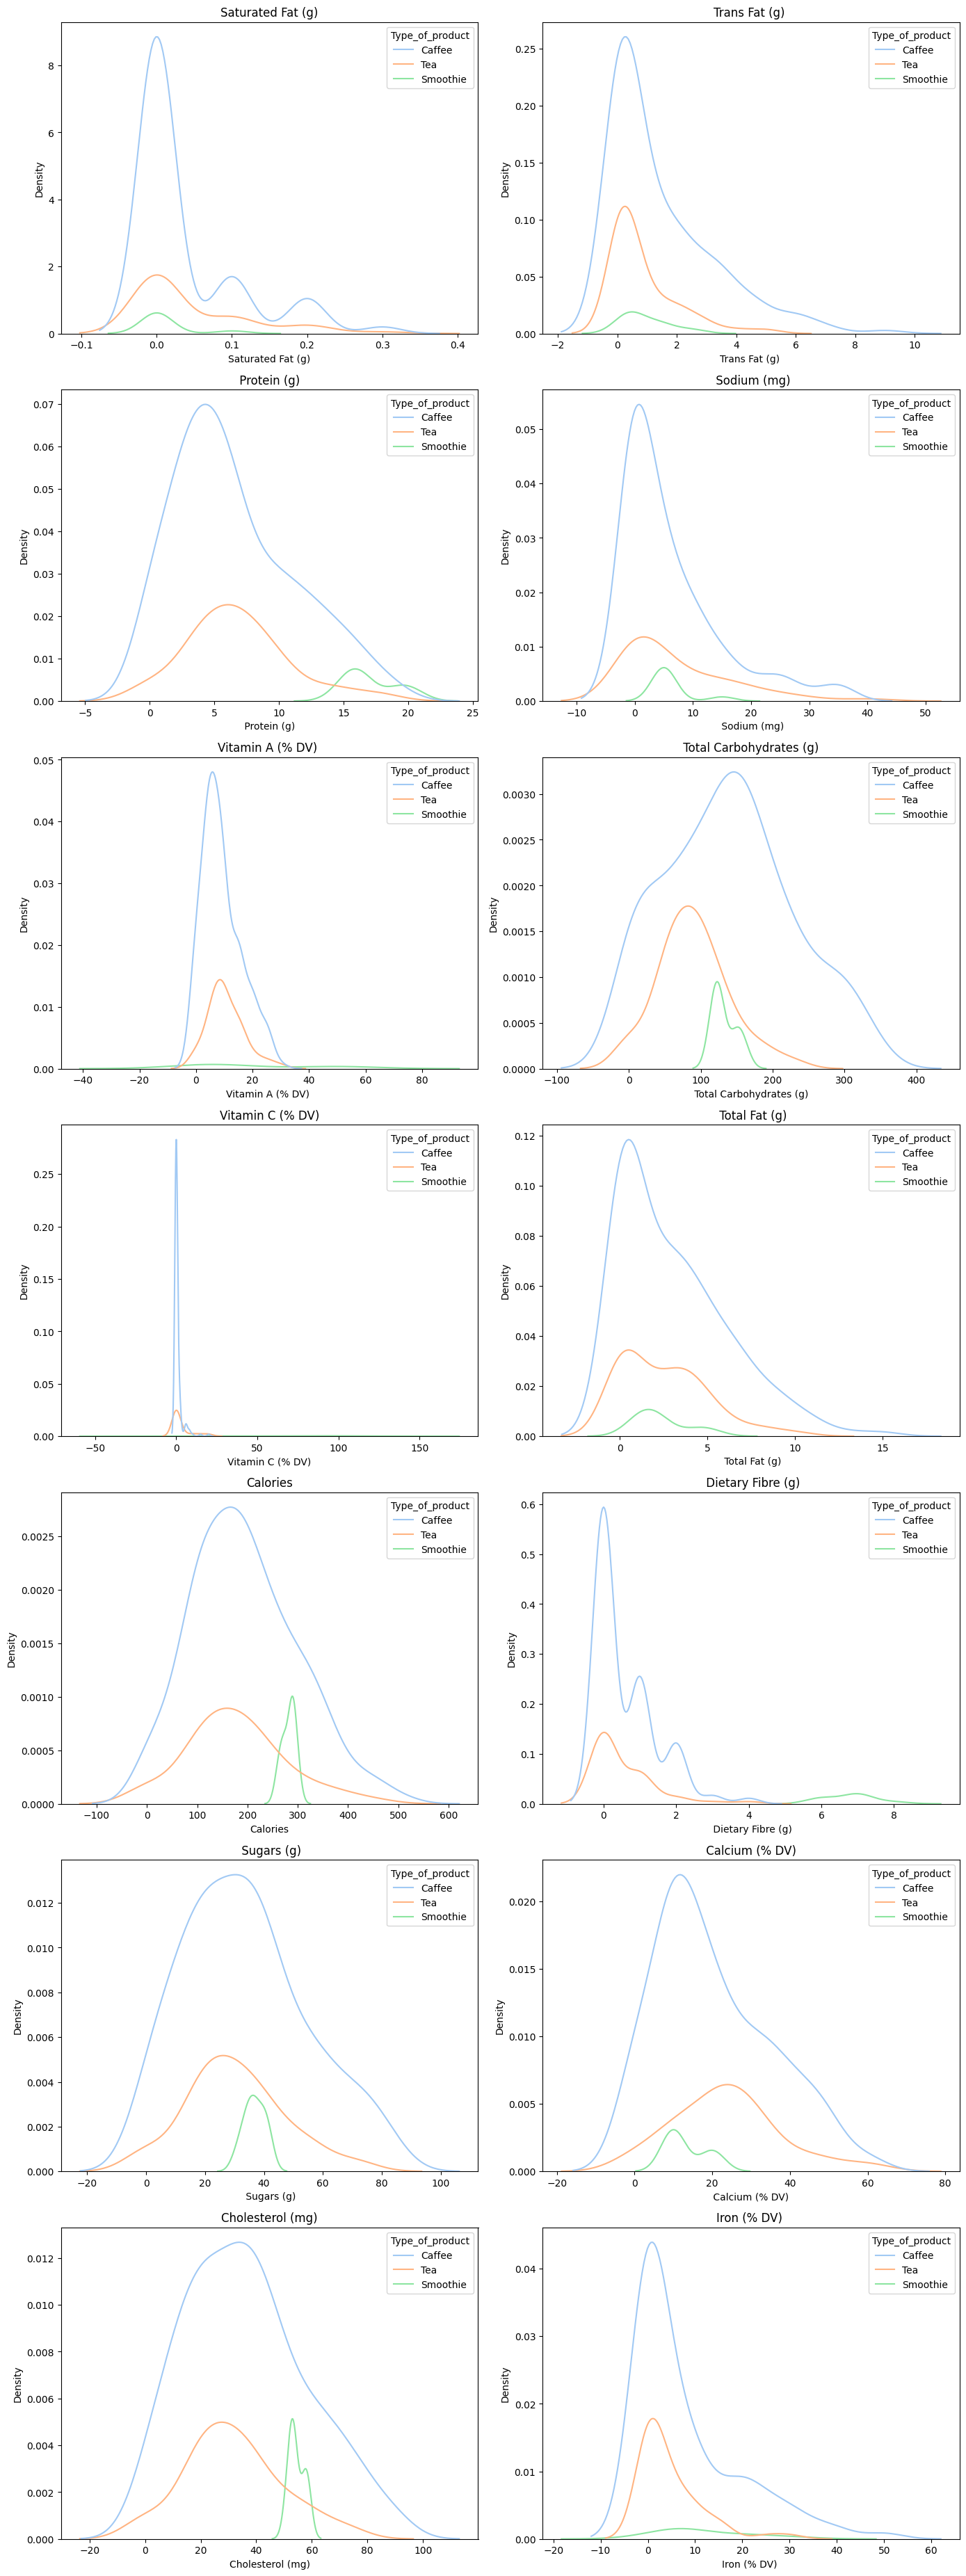

In [5]:
numerical_feature_list = {'Calories', ' Total Fat (g)', 'Trans Fat (g) ',
                          'Saturated Fat (g)', ' Sodium (mg)',
                          ' Total Carbohydrates (g) ', 'Cholesterol (mg)',
                          ' Dietary Fibre (g)', ' Sugars (g)', ' Protein (g) ',
                          'Vitamin A (% DV) ', 'Vitamin C (% DV)',
                          ' Calcium (% DV) ', 'Iron (% DV) ',}
plt.figure(figsize=(14, len(numerical_feature_list)*3))
for i , col in enumerate(numerical_feature_list):
    plt.subplot(len(numerical_feature_list)//2+1,2,i+1)
    sns.kdeplot(data=df, x=col, hue="Type_of_product", palette="pastel")
    plt.title(col)
    plt.tight_layout()